

---
title: "How to build 🐳 Docker Image & run Container"
execute: 
  enabled: false
  freeze: true
date: "6/19/2024"
categories: [docker]
---


> Step by step guide on how to build docker image on VSCode and run docker container on Docker Desktop App

It is seldom that I needed to use docker to validate pre-production code, but when I do, I find myself always having to retrace my steps trying to learn how to use docker again. So here is step by step guide to remind myself:

### 1. Build docker image

1. Open VSCode window, choose "Open Folder".
1. Choose the directory where we store the pre-production code we want to test. Eg "myfolder" here.


In [ ]:
.
└── myfolder/
    ├── newmodel_prediction.py
    ├── requirements.txt
    ├── Dockerfile
    ├── .gitignore
    └── .dockerignore


3. If not already exist, add .dockerignore. If the file we want to ignore is not in './myfolder' directory, we need to include full filepath.


In [ ]:
# .dockerignore
Dockerfile
bin
include
lib
venv
.env

4. If not already exist, create .gitignore. Fill in any filenames that you want to exclude. If the file we want to ignore is not in './myfolder' directory, we need to include full filepath.

In [ ]:
# .gitignore
.env
bin
lib
include
share
.ipynb_checkpoints


5. If not already exist, create requirements.txt. We can automatically create one using terminal. In terminal:

In [ ]:
# make sure we have pipreqs installed, if not install using:
!pip install pipreqs

# create requirements.txt in the parent directory
!pipreqs .

6. Create Dockerfile. Currently, below is the minimal working dockerfile we can use to test any pre-production code.
The last line `CMD ["python3.8", "./newmodel_prediction.py"]` means as soon as the container is running, run `python 3.8 ./newmodel_prediction.py`.

In [ ]:
# Dockerfile

# enter what specific python image we want to work with
FROM python:3.8.16

RUN apt-get install libgomp1

WORKDIR /usr/local/bin
ADD . ./

RUN python -m pip install -r requirements.txt

# what command we want to run as soon as the container is running
CMD ["python3.8", "./newmodel_prediction.py"]


7. Open up docker desktop apps.
8. Build docker image. The easiest way to create an image in VSCode:
   1. Open up Dockerfile 
   2. In Dockerfile, right-click and select "Build Image..."
      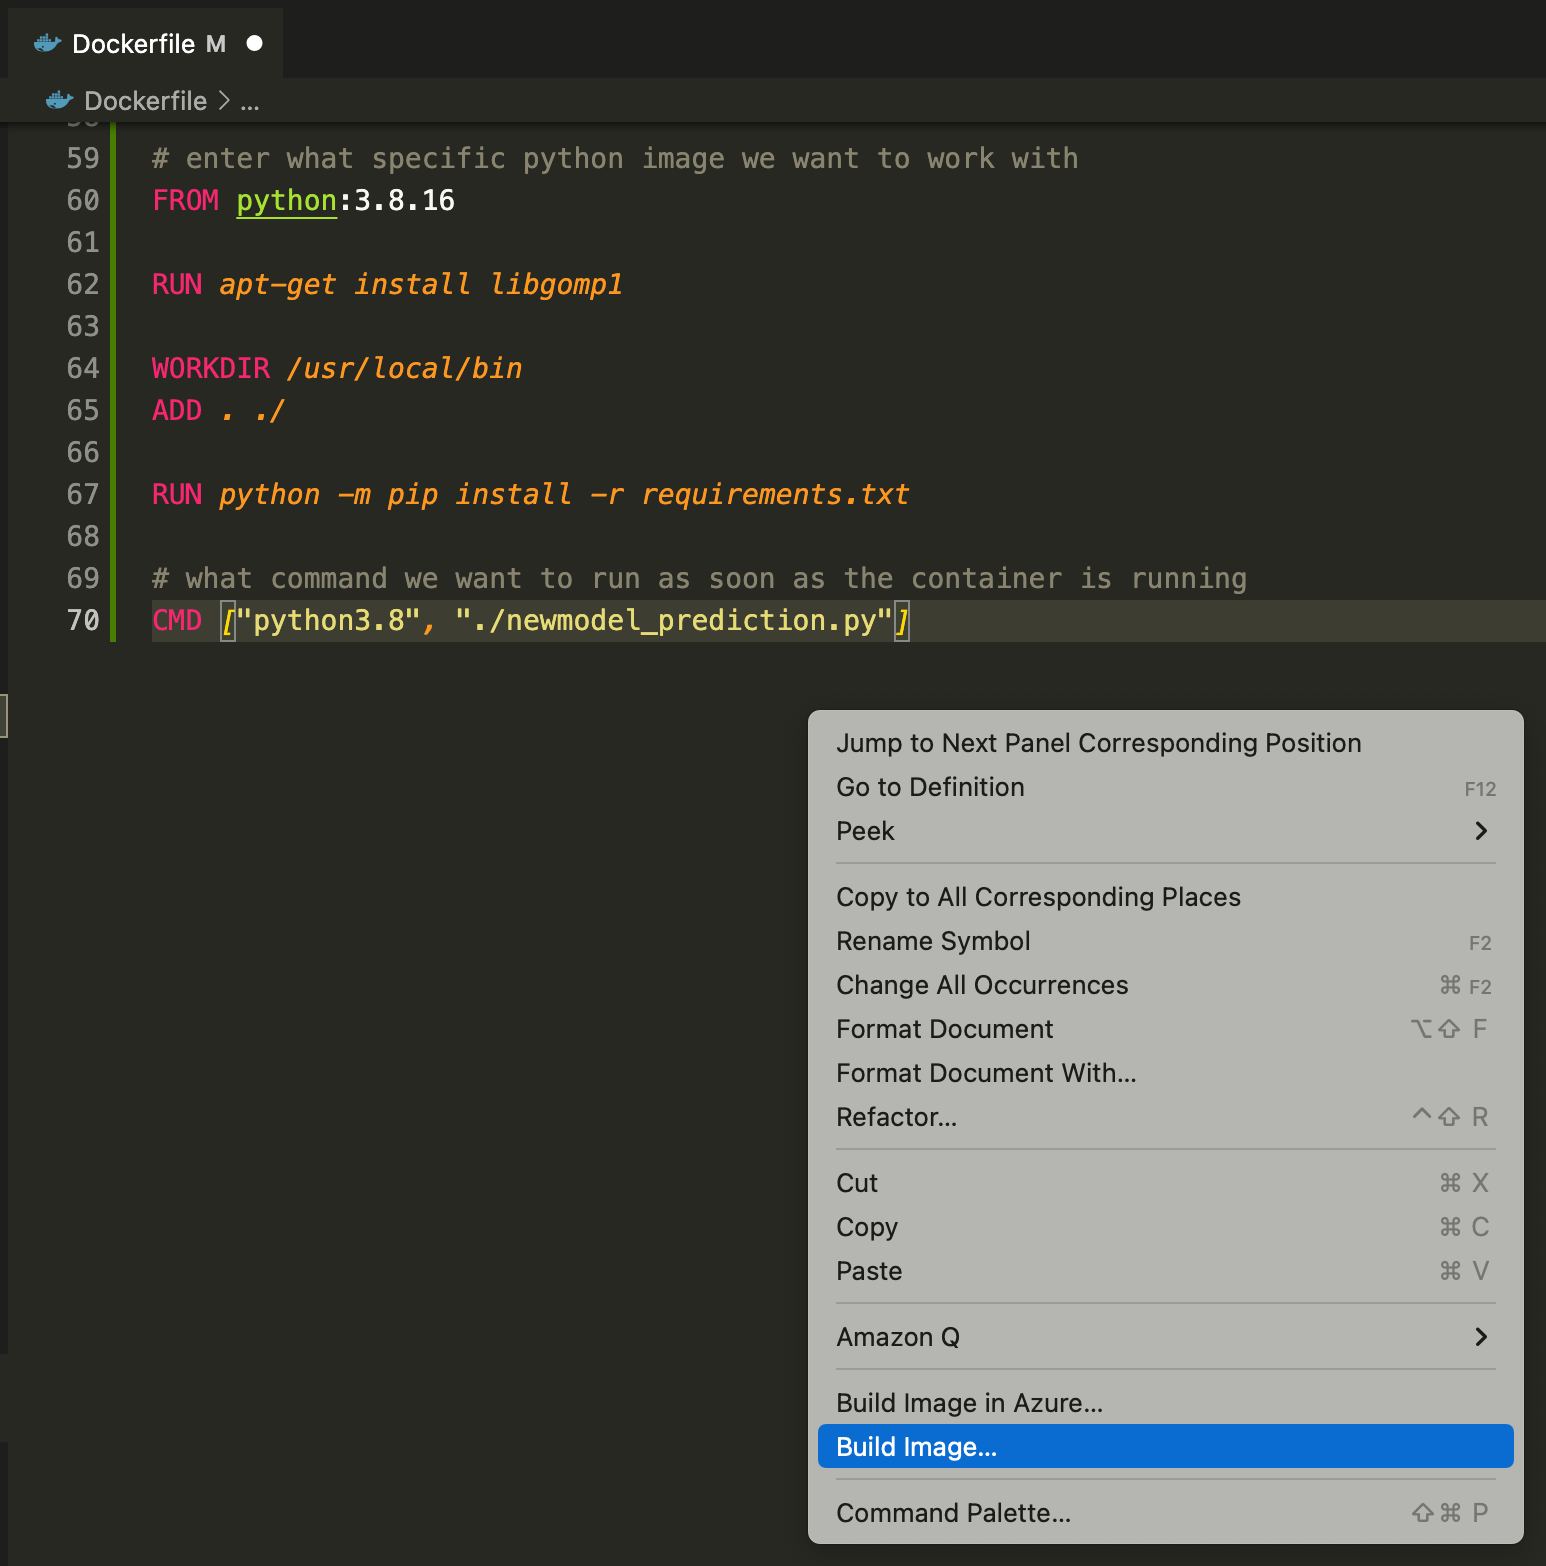
   4. Look notice the "myfolder:1" in the command pallete. "myfolder" is there because it is the name of our current directory, this will become the default image name. "1" here is the default image tag. We can change both the image name and the tag if we wish, or just press enter to use the default.
      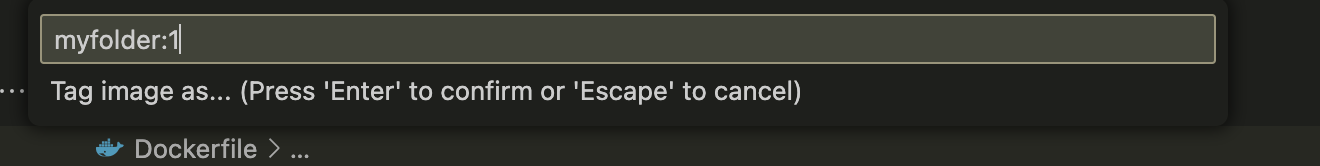
   5. If there is no error, your terminal should look similar like so.
      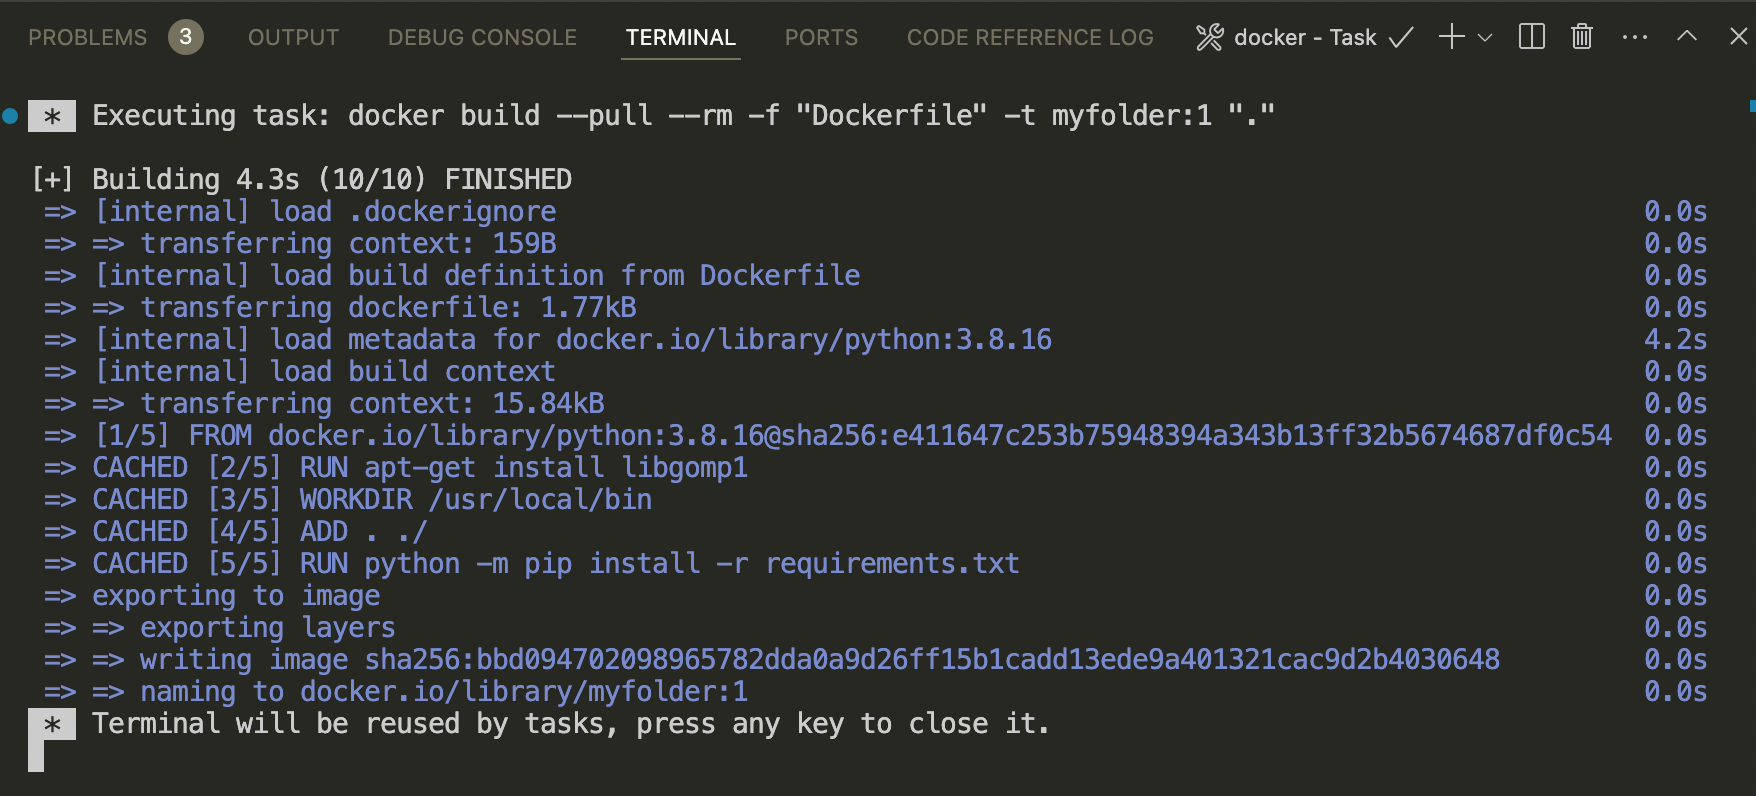
   6. Observe that we have newly created image in our docker desktop app.
      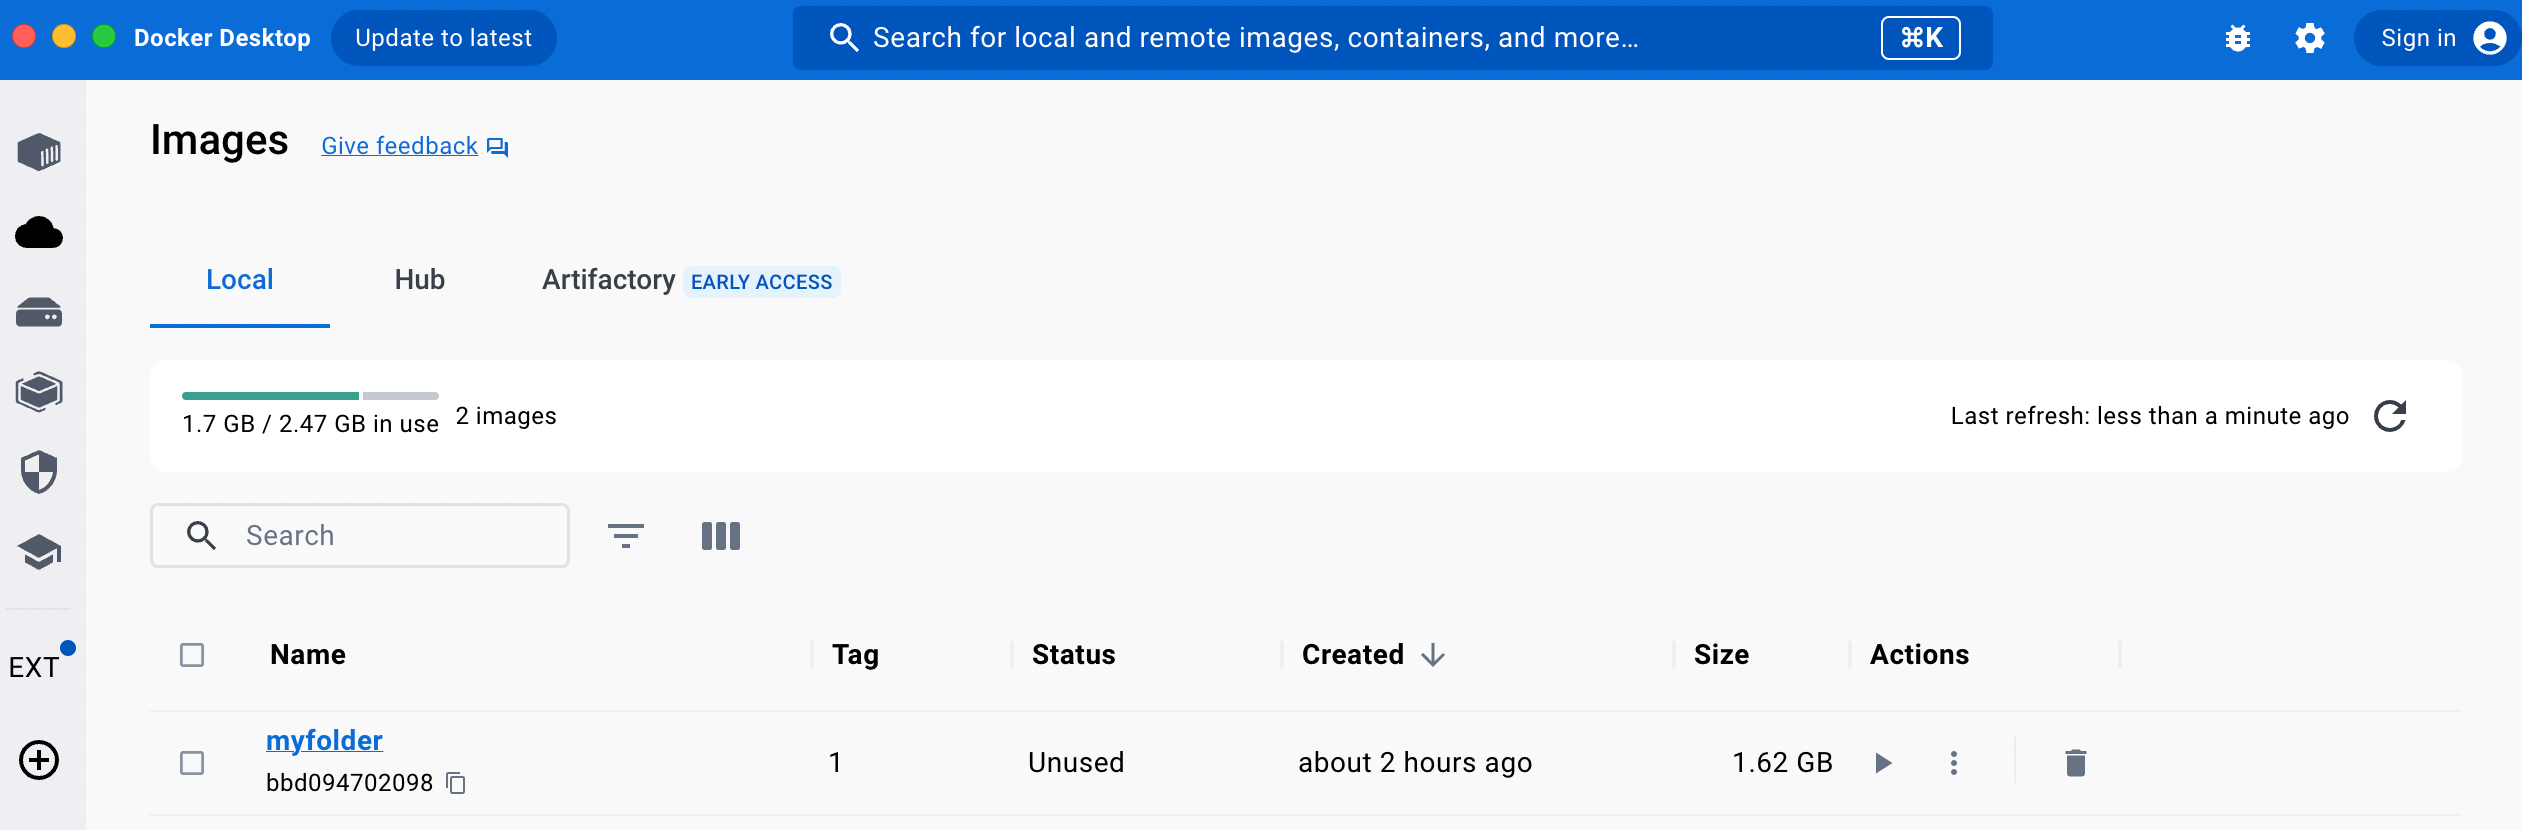

### 2. Create docker container & run

1. Click on the newly created image.
 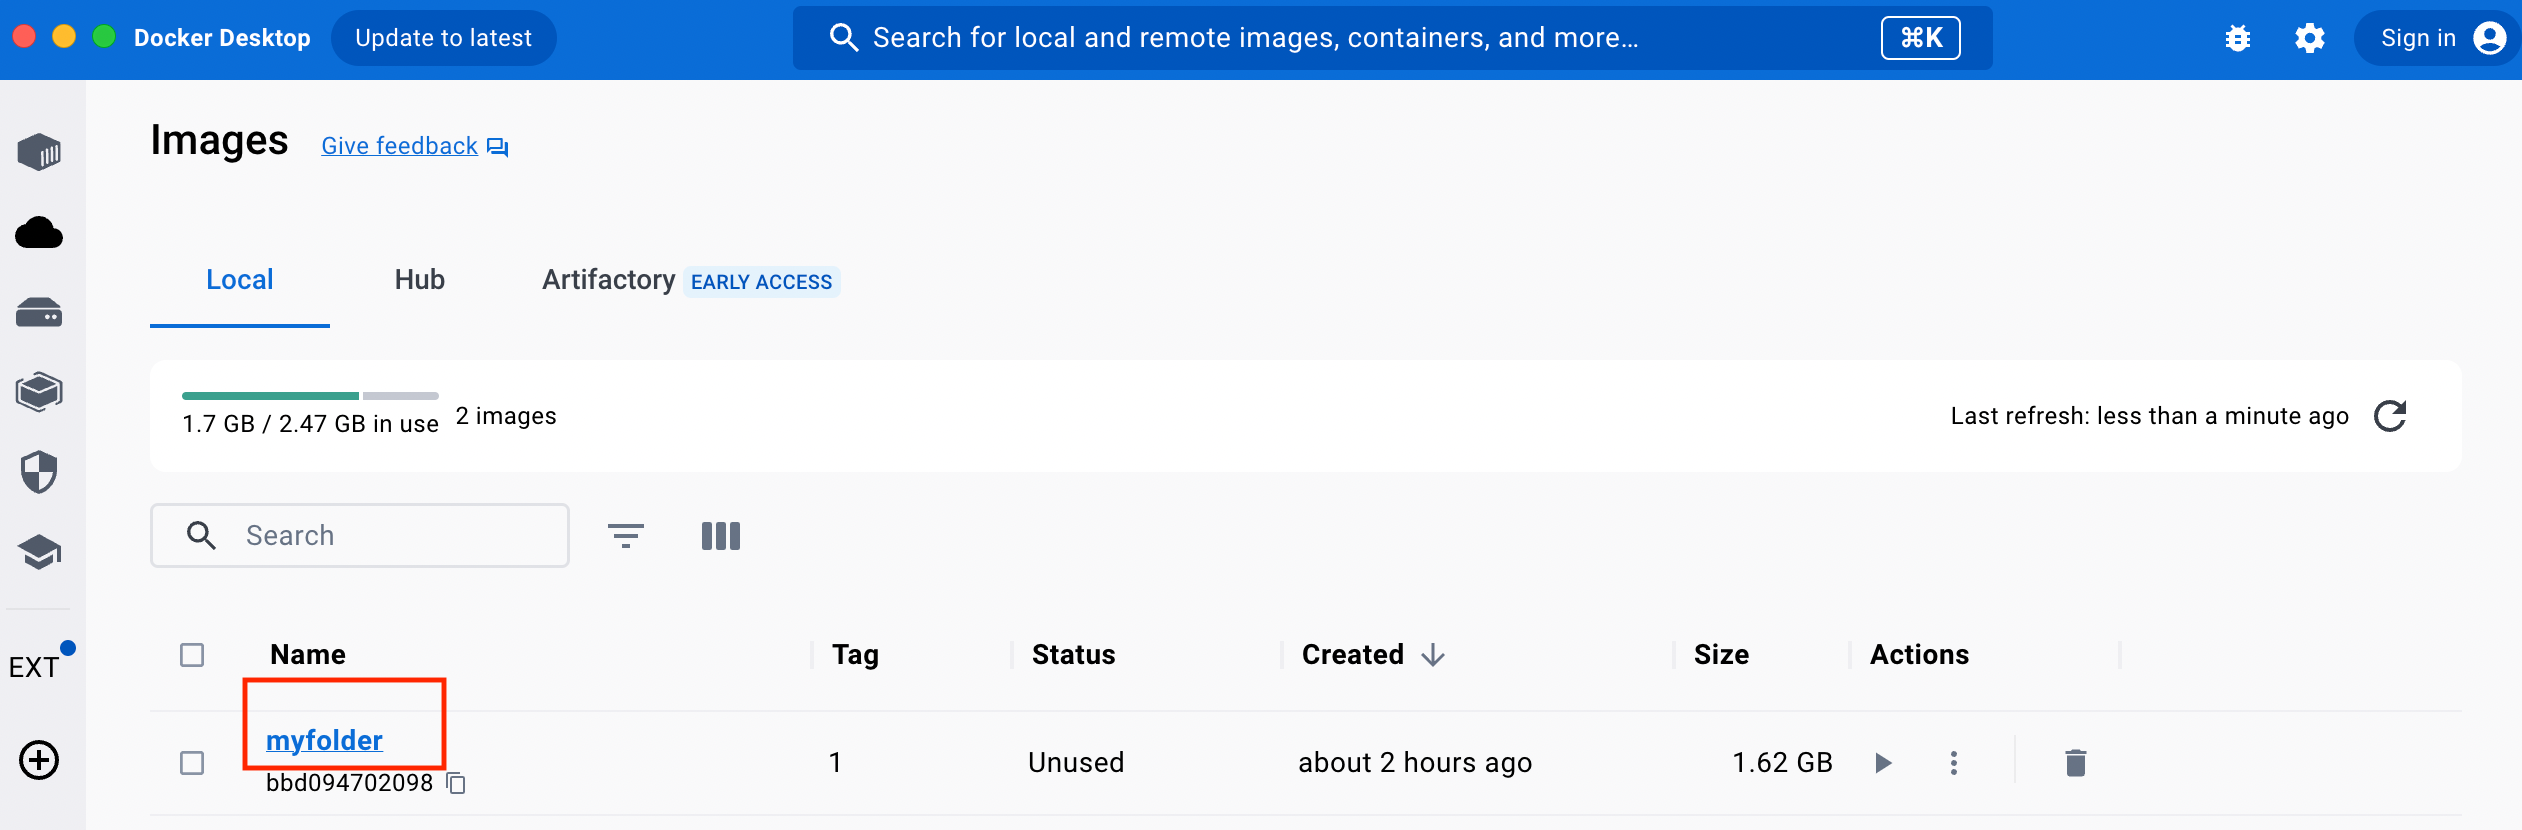
2. Set container name (optional). Add any environment variables if needed. The environment variables you included here will be used to run the container. (See docker <a href="https://docs.docker.com/compose/environment-variables/envvars-precedence/">documentation</a> for environment variables precedence)
    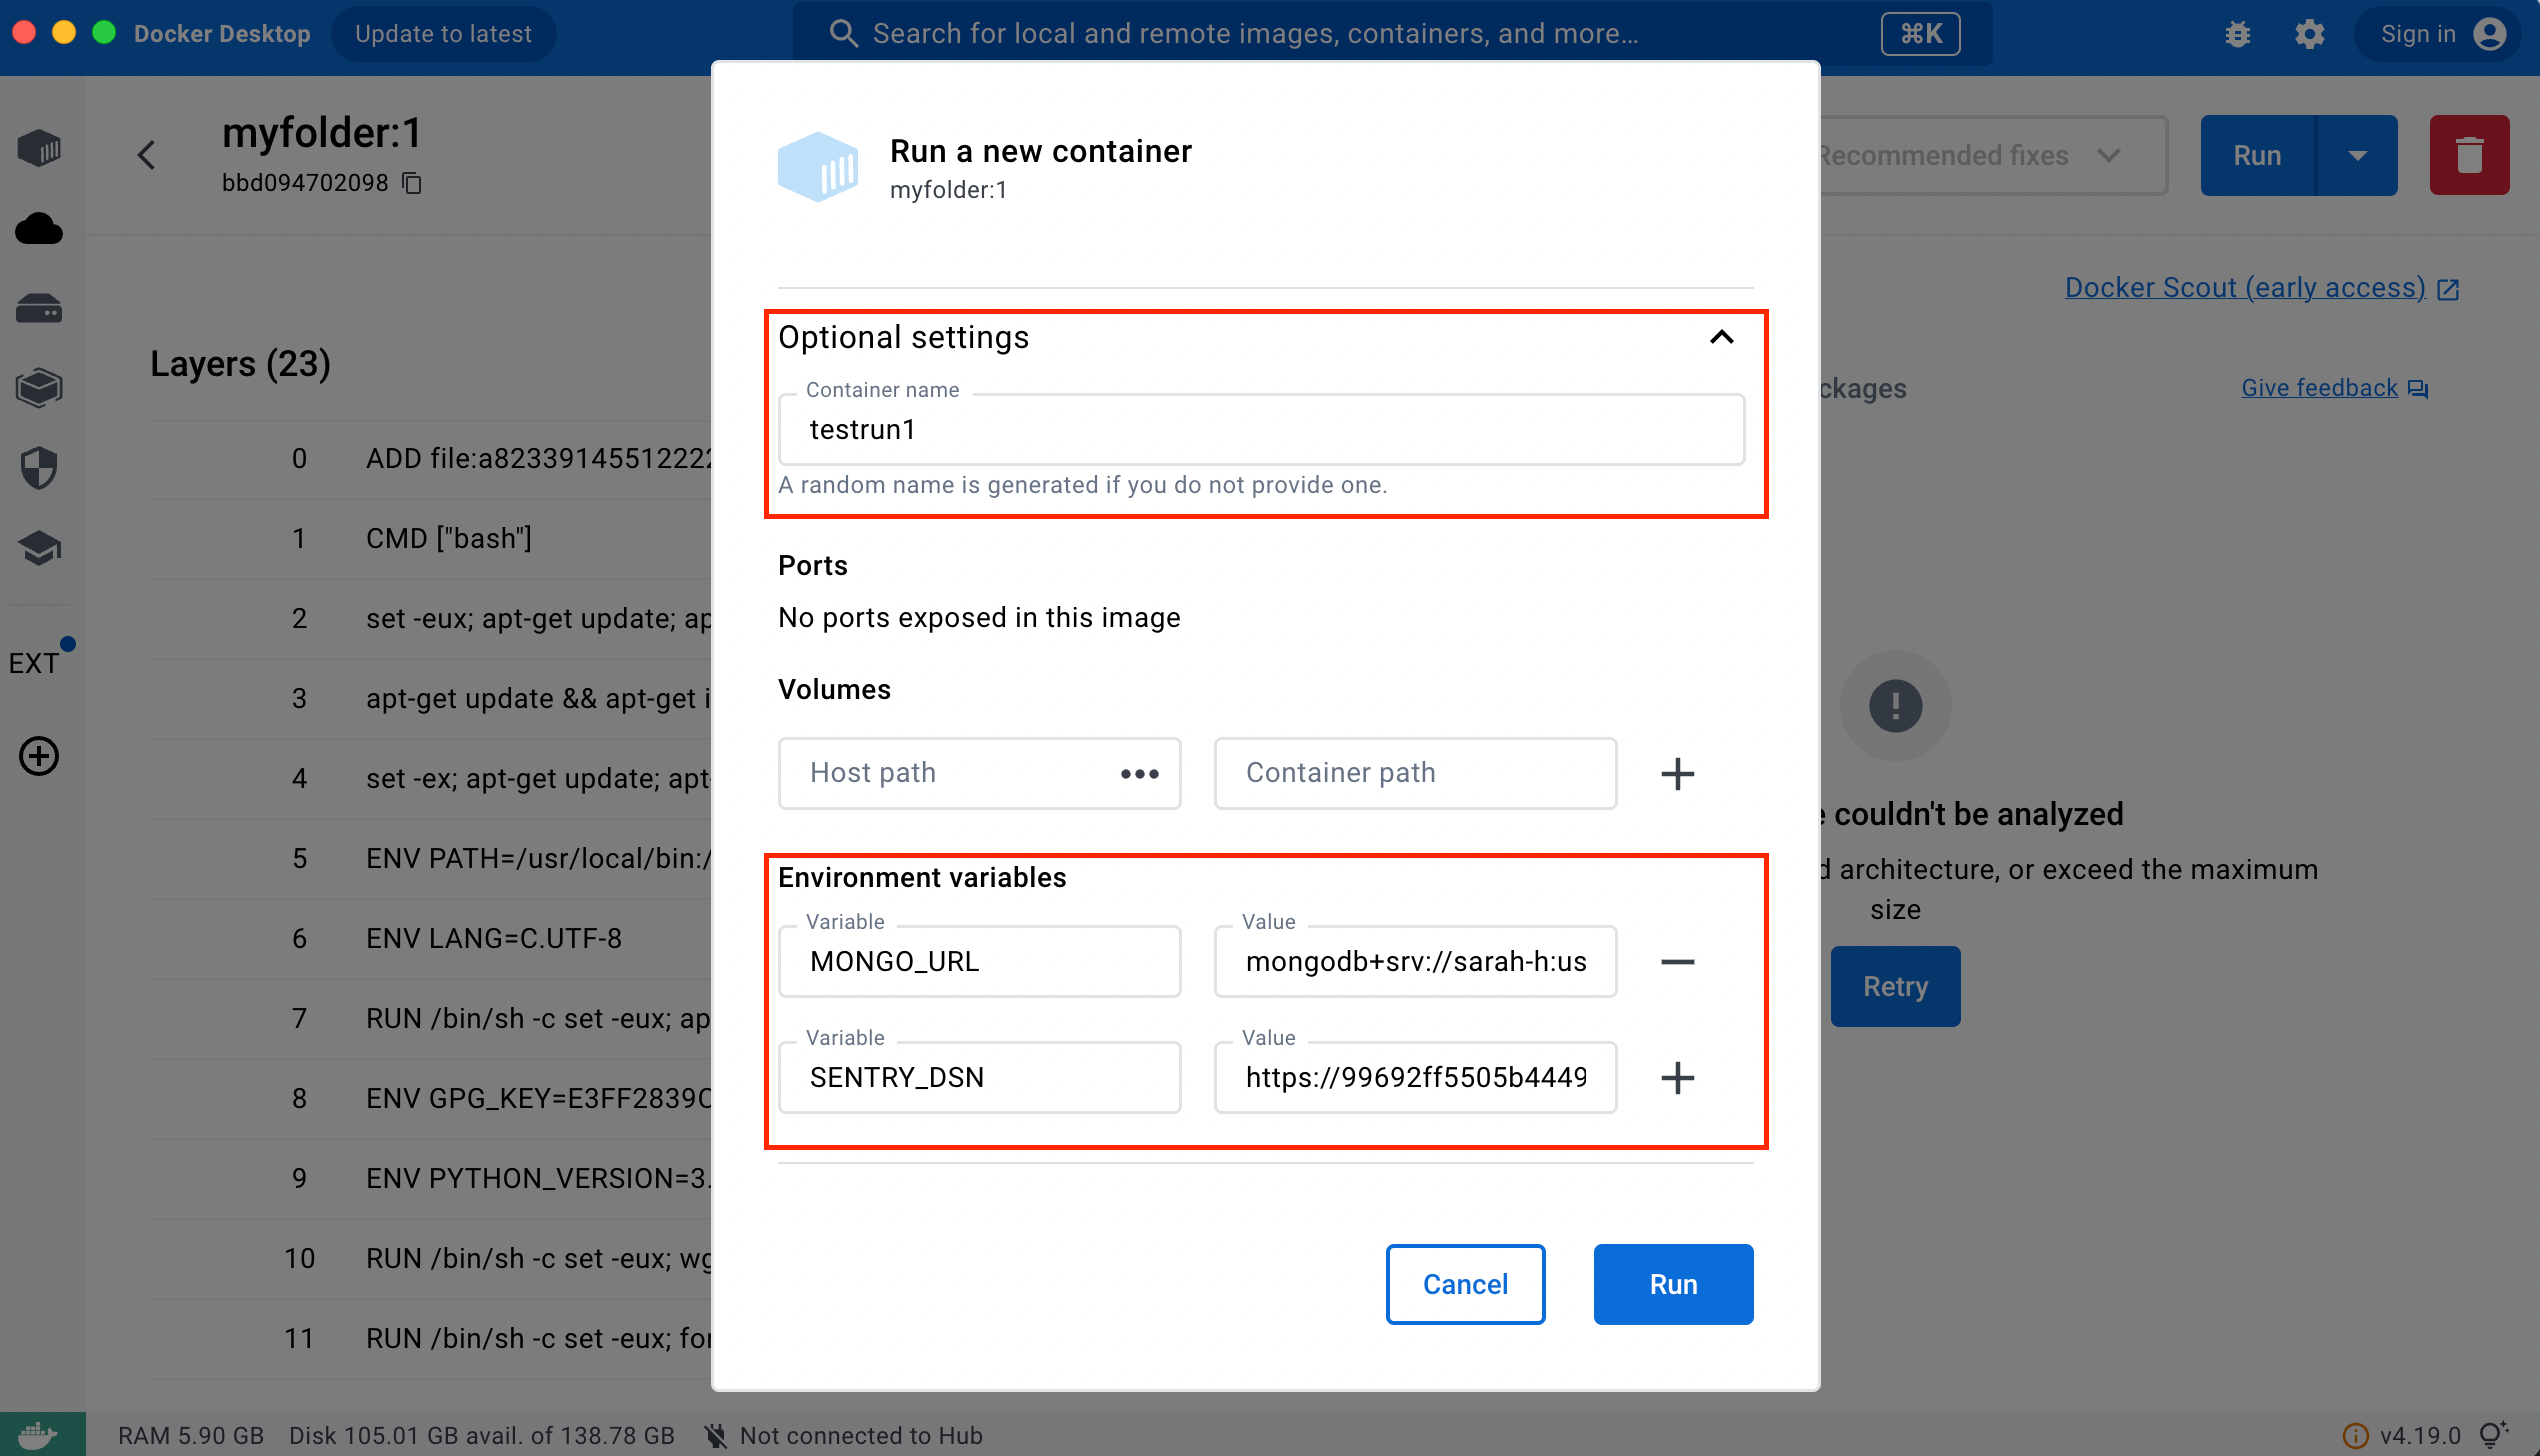
3. You will be directed to container tab. Notice the container name "testrun1", image name and tag "myfolder:1".You can confirm that the container is currently running when the play button ▶️ on the right hand corner is grayed out. You can stop the container by clicking on the stop button ⏹.
Since we created our ended our Dockerfile with `CMD ["python3.8", "./newmodel_prediction.py"]`, this means it will directly run the specified file. However, we could also manually run anything through the terminal should we wish, like so.
   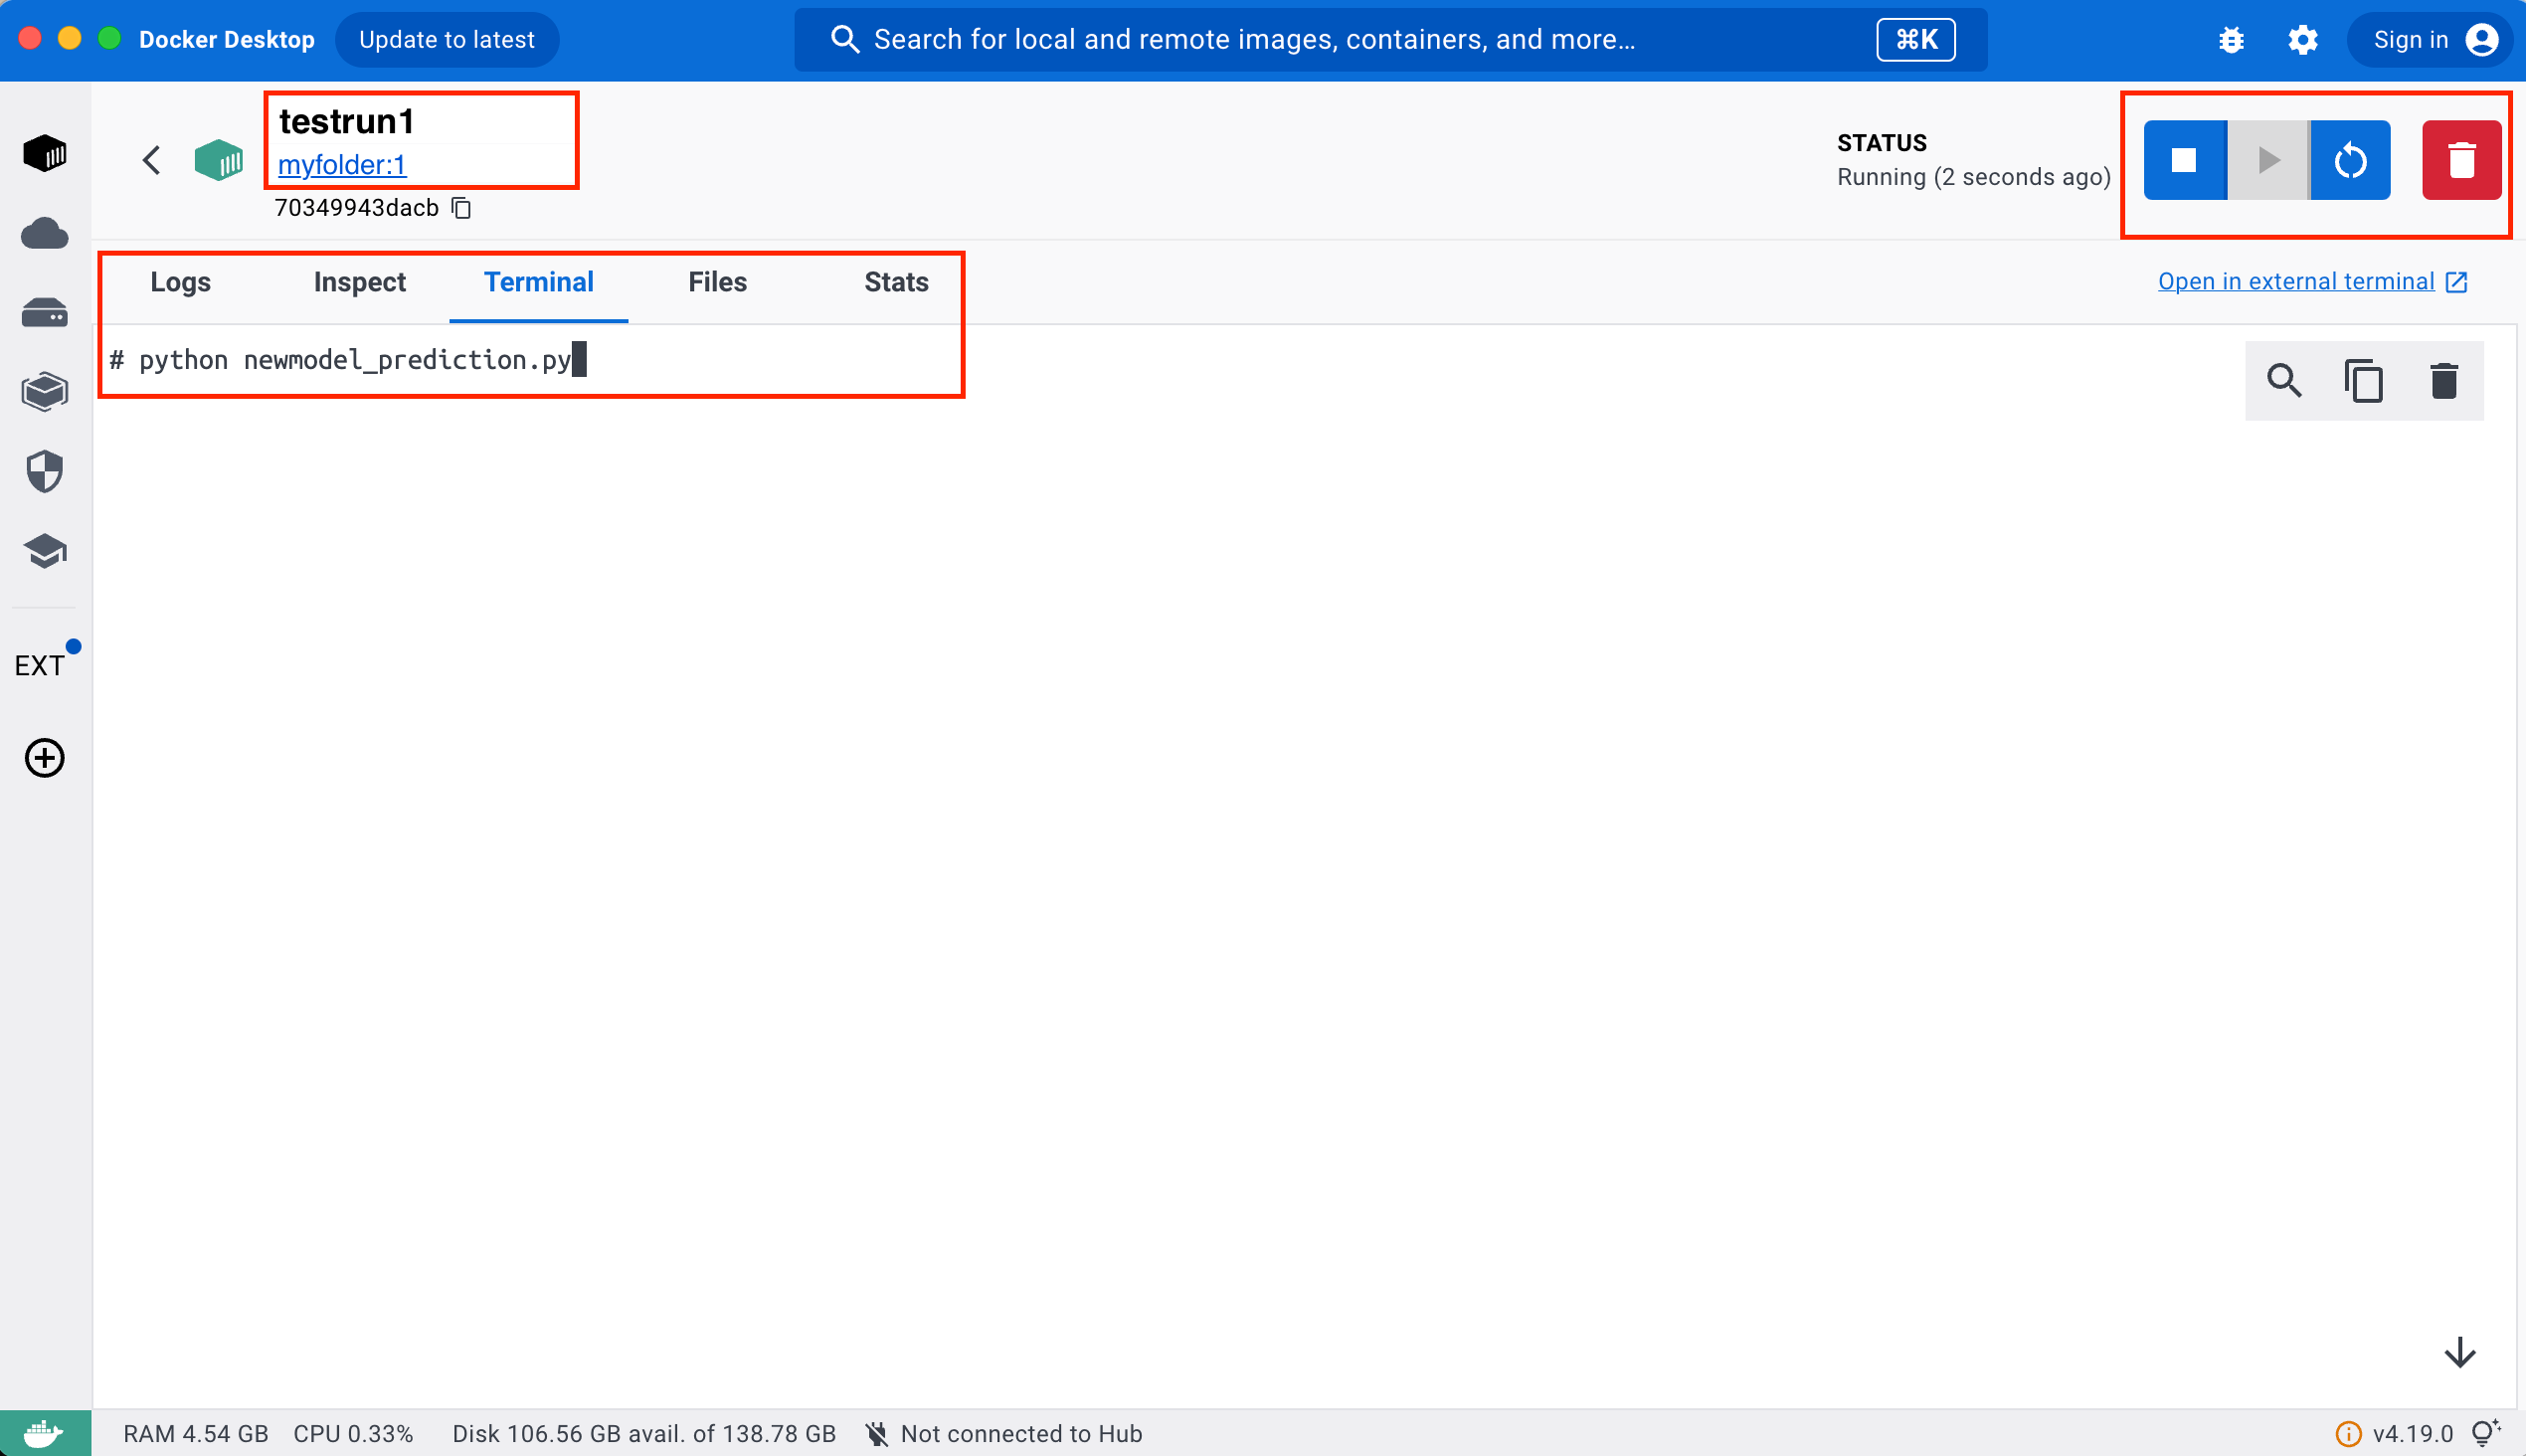

Note: Docker containers and images take up space. You might want to delete them if unused.